#Qestion1

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [11]:


# Load the dataset
qn1 = pd.read_csv("housing.csv")
qn1.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#ocean_proximity column is not having numerical values

In [12]:
print((qn1["ocean_proximity"].unique()))
# Convert ocean_proximity to numerical
# Among the 5 unique values Near Bay and Near Ocean mean the same thing . Thus we can map it to the same value.
ocean_mapping = {'NEAR BAY': 1, 'NEAR OCEAN': 1, '<1H OCEAN': 2, 'INLAND': 3, 'ISLAND': 4}
qn1['ocean_proximity'] = qn1['ocean_proximity'].map(ocean_mapping)
qn1.head()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


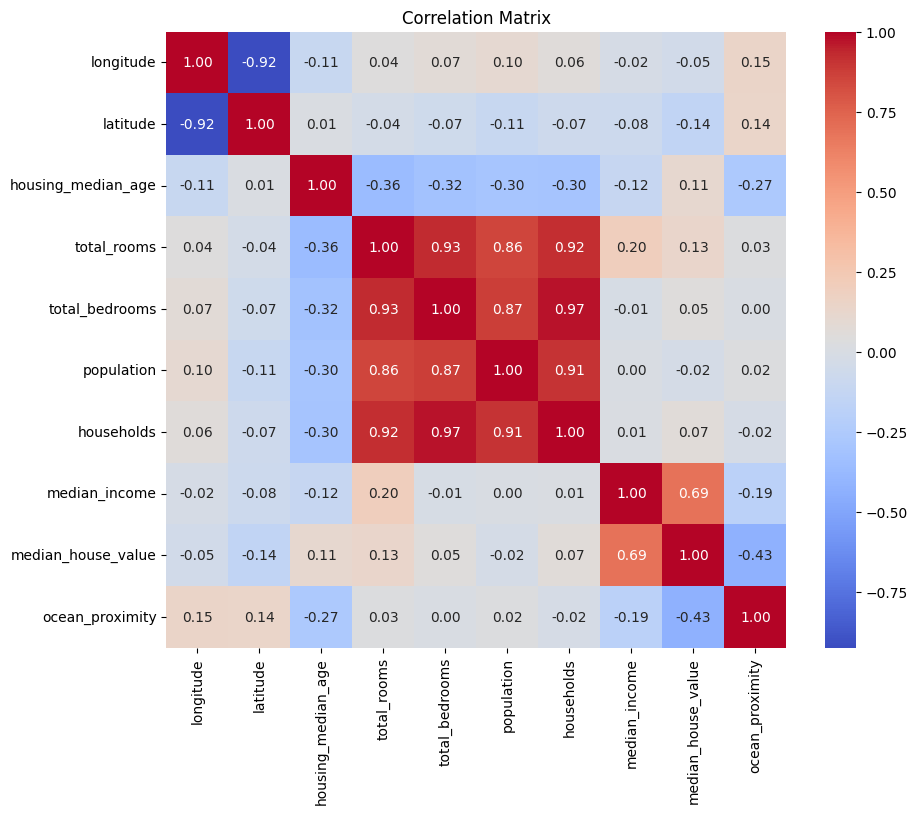

total_bedrooms vs total_rooms: 0.9272526981589968
households vs population: 0.9072222660959613
longitude vs latitude: -0.924664433915041


In [13]:



# # Fill missing values in total_bedrooms
qn1['total_bedrooms'].fillna(qn1['total_bedrooms'].mean(), inplace=True)

# Visualize correlation
correlation_matrix = qn1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

# Perform correlation tests
correlation_tests = {
    'total_bedrooms vs total_rooms': np.corrcoef(qn1['total_bedrooms'], qn1['total_rooms'])[0, 1],
    'households vs population': np.corrcoef(qn1['households'], qn1['population'])[0, 1],
    'longitude vs latitude': np.corrcoef(qn1['longitude'], qn1['latitude'])[0, 1]
}
for test, corr in correlation_tests.items():
    print(f'{test}: {corr}')


In [8]:
#From the above correlation test we can see using one of such two variables is enough whle building the model.

In [15]:

from scipy.stats import pearsonr

cor_test_1 = pearsonr(qn1['total_bedrooms'], qn1['total_rooms'])
cor_test_2 = pearsonr(qn1['households'], qn1['population'])
cor_test_3 = pearsonr(qn1['longitude'], qn1['latitude'])

print("Correlation test 1:", cor_test_1)
print("Correlation test 2:", cor_test_2)
print("Correlation test 3:", cor_test_3)

# Linear regression models
from statsmodels.formula.api import ols

f1 = 'median_house_value ~ longitude + housing_median_age + total_rooms + households + median_income + ocean_proximity'
r1 = ols(formula=f1, data=qn1).fit()
print(r1.summary())

f2 = 'median_house_value ~ latitude + housing_median_age + total_bedrooms + population + median_income + ocean_proximity'
r2 = ols(formula=f2, data=qn1).fit()
print(r2.summary())


Correlation test 1: PearsonRResult(statistic=0.9272526981589972, pvalue=0.0)
Correlation test 2: PearsonRResult(statistic=0.9072222660959616, pvalue=0.0)
Correlation test 3: PearsonRResult(statistic=-0.924664433915041, pvalue=0.0)
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     5027.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:04:46   Log-Likelihood:            -2.6057e+05
No. Observations:               20640   AIC:                         5.212e+05
Df Residuals:                   20633   BIC:                         5.212e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                     

In [30]:

# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X1 = qn1[['longitude', 'housing_median_age','total_rooms','households', 'median_income', 'ocean_proximity']]
y1 = qn1['median_house_value']
X1 = sm.add_constant(X1)
r1 = sm.OLS(y1, X1).fit()

# VIF for Model 1
vif1 = pd.DataFrame()
vif1["Features"] = X1.columns
vif1["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif1)




             Features          VIF
0               const  3756.257850
1           longitude     1.031655
2  housing_median_age     1.263301
3         total_rooms     8.887635
4          households     8.393098
5       median_income     1.408296
6     ocean_proximity     1.218576


In [31]:
### after modification
X1 = qn1[['longitude', 'housing_median_age','households', 'median_income', 'ocean_proximity']]
y1 = qn1['median_house_value']
X1 = sm.add_constant(X1)
r1 = sm.OLS(y1, X1).fit()

# VIF for Model 1
vif1 = pd.DataFrame()
vif1["Features"] = X1.columns
vif1["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif1)

             Features          VIF
0               const  3734.015017
1           longitude     1.028609
2  housing_median_age     1.244484
3          households     1.119253
4       median_income     1.072017
5     ocean_proximity     1.167709


In [37]:
## model 2
X2 = qn1[['latitude', 'housing_median_age','total_rooms', 'population', 'median_income', 'ocean_proximity']]
y2 = qn1['median_house_value']
X2 = sm.add_constant(X2)
r2 = sm.OLS(y2, X2).fit()

# VIF for Model 1
vif2 = pd.DataFrame()
vif2["Features"] = X2.columns
vif2["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif2)

             Features         VIF
0               const  324.941723
1            latitude    1.058926
2  housing_median_age    1.259798
3         total_rooms    4.657743
4          population    4.381543
5       median_income    1.245197
6     ocean_proximity    1.158862


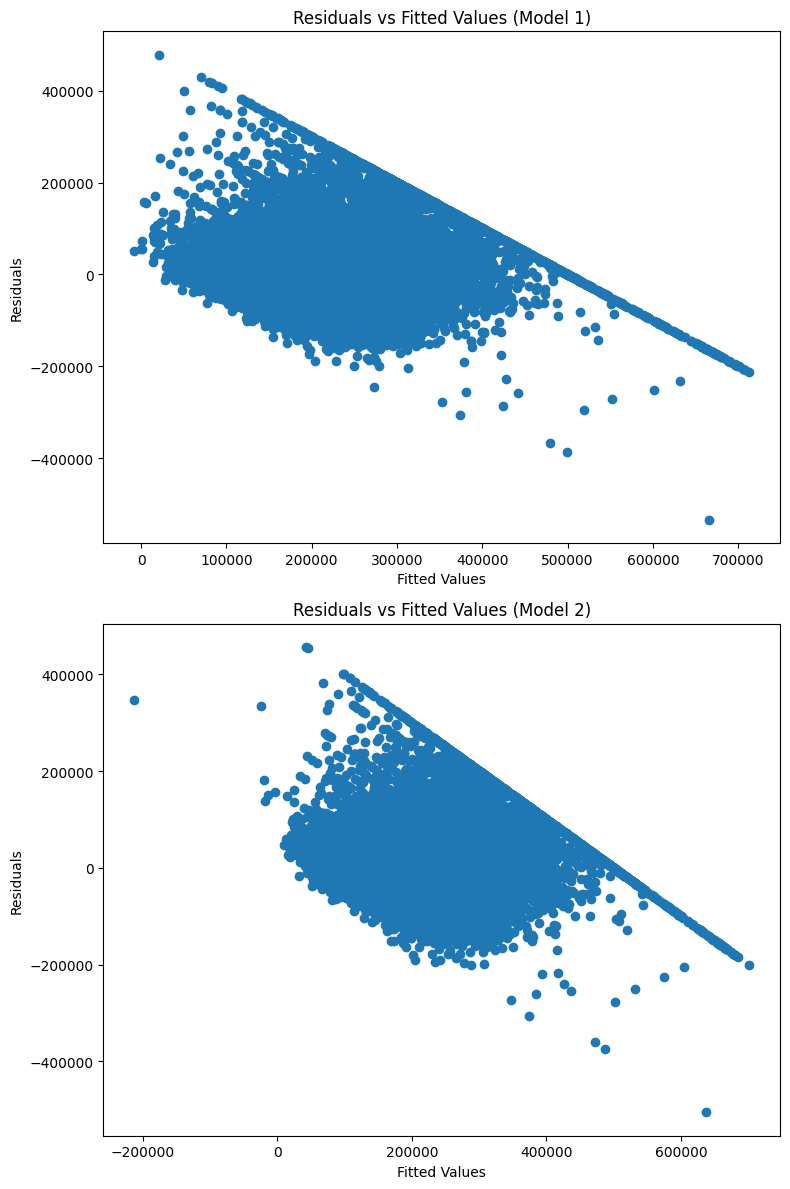

In [40]:

# Plot residuals vs fitted values
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

for i, (model, ax) in enumerate(zip([r1, r2], axes)):
    fitted_values = model.fittedvalues
    residuals = model.resid
    ax.scatter(fitted_values, residuals)
    ax.set_xlabel("Fitted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(f"Residuals vs Fitted Values (Model {i+1})")

plt.tight_layout()
plt.show()

# Test for heter

Model 1 Heteroscedasticity Test p-value: 667.1278309570644
Model 2 Heteroscedasticity Test p-value: 766.3930700880205


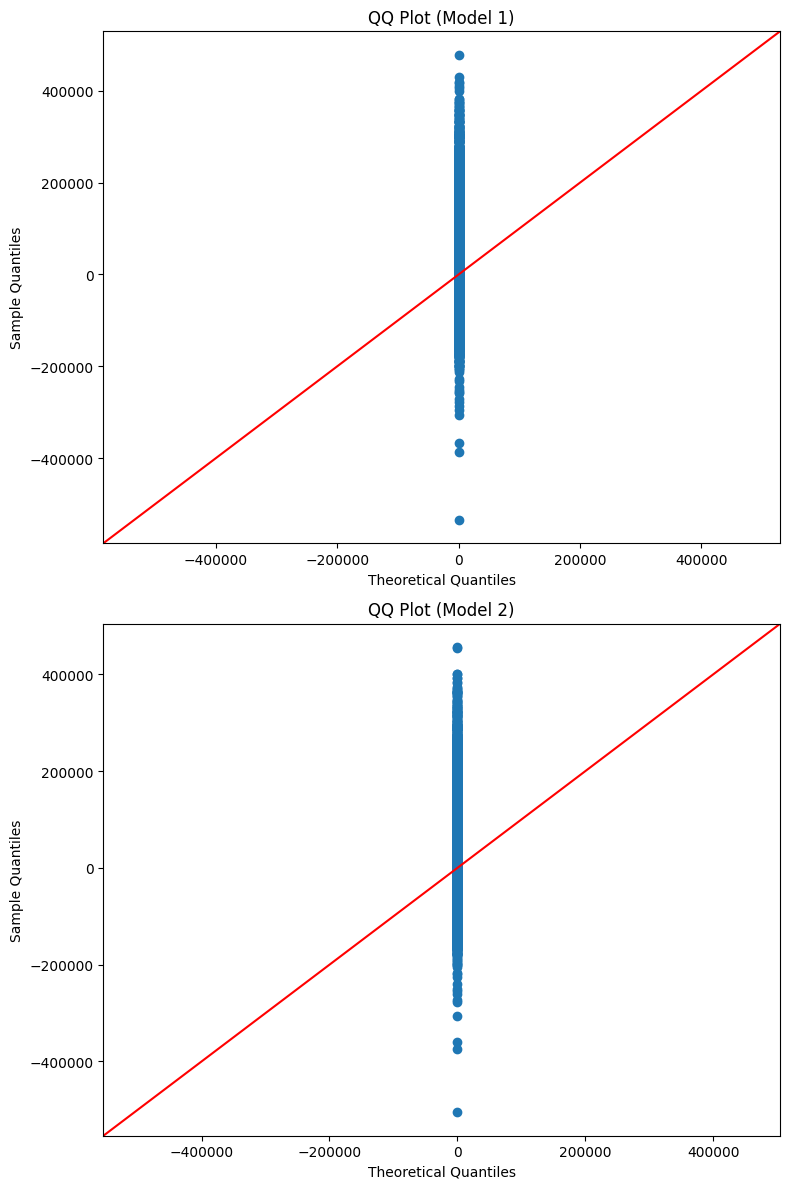

Best model based on AIC: Model 2
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     5051.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:22:00   Log-Likelihood:            -2.6054e+05
No. Observations:               20640   AIC:                         5.211e+05
Df Residuals:                   20633   BIC:                         5.212e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
con

In [43]:

# Test for heteroscedasticity
het_tests = [het_breuschpagan(model.resid, model.model.exog) for model in [r1, r2]]
for i, (p_value, _,_,_) in enumerate(het_tests, start=1):
    print(f"Model {i} Heteroscedasticity Test p-value: {p_value}")

# Test for normality of residuals (QQ plot)
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

for i, (model, ax) in enumerate(zip([r1, r2], axes)):
    sm.qqplot(model.resid, line='45', ax=ax)
    ax.set_title(f"QQ Plot (Model {i+1})")

plt.tight_layout()
plt.show()

# Compare AIC of the models
aic_values = [model.aic for model in [r1, r2]]
best_model_idx = np.argmin(aic_values)
print(f"Best model based on AIC: Model {best_model_idx + 1}")

# Report coefficients and confidence intervals for the best model
best_model = [r1, r2][best_model_idx]
print(best_model.summary())
print(best_model.conf_int(alpha=0.05))  # 95% confidence intervals

